<a href="https://colab.research.google.com/github/Bijayanee/CI_Projects/blob/main/DigitsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Load and Prepare the Data

In [ ]:
# Load digits dataset
digits = load_digits()
X = digits.data        # Shape: [n_samples, 64]
y = digits.target      # Labels: 0–9

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define the Perceptron Model

In [ ]:
class MultiOutputPerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)  # raw logits

Training Setup

In [ ]:
model = MultiOutputPerceptron(input_size=64, output_size=10)
criterion = nn.CrossEntropyLoss()  # handles softmax internally
optimizer = optim.SGD(model.parameters(), lr=0.1)

Train the Model

In [ ]:
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 0.2854
Epoch 20/100, Loss: 0.2713
Epoch 30/100, Loss: 0.2591
Epoch 40/100, Loss: 0.2483
Epoch 50/100, Loss: 0.2388
Epoch 60/100, Loss: 0.2302
Epoch 70/100, Loss: 0.2225
Epoch 80/100, Loss: 0.2155
Epoch 90/100, Loss: 0.2091
Epoch 100/100, Loss: 0.2032


Plot Loss Curve

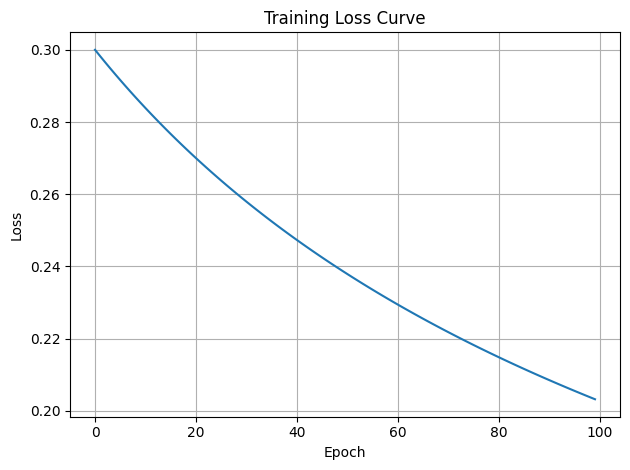

In [ ]:
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

Evaluate Accuracy

In [ ]:
model.eval()
with torch.no_grad():
    test_logits = model(X_test)
    predictions = torch.argmax(test_logits, dim=1)
    accuracy = (predictions == y_test).float().mean()
    print(f"\nTest Accuracy: {accuracy.item() * 100:.2f}%")


Test Accuracy: 94.44%
